In [1]:
######################
#import useful modules
######################

import sys 
#sys.path.append('/home2/datahome/tpicard/Pyticles/Modules/')
sys.path.append('/home2/datahome/tpicard/python/Python_Modules_RREX2008/')

from Modules import *
from Modules_gula import *
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4

# np.float --> float
# np.int --> int


plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['xtick.labelsize'] = 16  # Taille des ticks sur l'axe des x
plt.rcParams['ytick.labelsize'] = 16  # Taille des ticks sur l'axe des y
plt.rcParams['axes.titlesize'] = 16  # Taille du titre
plt.rcParams['axes.labelsize'] = 16  # Taille du label de l'axe des x
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = '20.0'


/home2/datahome/tpicard/conda-env/croco/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:

from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/Presentation_plot/")
sys.path.append("../")
from plot_function import *
#from variables_create_data import *

folder_in_pyticle = "/home/datawork-lemar-apero/tpicard/PYTICLE/"

tend = 1370
t0 = tend-120
file = folder_in_pyticle + 'apero_trap3000m_wsed100_2000dx_100nx_00{0}_00{1}.nc'.format(t0,tend) #AC?
number_of_exp = 0

#List of the 36 sub-patches centers 
ic_all_list = np.linspace(1520.5,1610.5,6)
jc_all_list = np.linspace(569.5,659.5,6)
i_ic = 3
i_jc = 3

nc = Dataset(file, 'r')

part_x = nc.variables['px'][:,:]
part_y = nc.variables['py'][:,:]
pdepth = nc.variables['pdepth'][:,:] #(dt,nb_particle)

[ic,jc] = [ic_all_list[i_ic],  jc_all_list[i_jc]]

#[ic,jc] = np.load('/home2/datahome/tpicard/Pyticles/Inputs/ic_jc.npy')

index_part = spatial_filter(part_x,part_y,ic,jc,number_of_exp) #Filtre spatial #0, 20 ou 40

part_x = part_x[:,index_part]
part_y = part_y[:,index_part]
pdepth = pdepth[:,index_part] #(dt,nb_particle)

dx, dy = 1.979, 1.979 #grid size
npart_trap = pdepth.shape[1]

x_disp = []
y_disp = []
time = []

#list_level = [2500,2000,1500,1000,200]
list_level = [3000,2000,1000,200]
x_disp_level = np.zeros((len(list_level),720))
y_disp_level = np.zeros((len(list_level),720))

l = 0
for level in list_level:
    x_disp =[]
    y_disp=[]
    for ipart in range(npart_trap):

        index_realtime = np.where( pdepth[:,ipart] != 0 )[0] # find the period when particles are released

        if index_realtime.size != 0:# check if particles are released
            pdepth_tmp = pdepth[index_realtime,ipart]
            index_200m = np.argmax(pdepth_tmp > -level)


            if index_200m != 0: # particles have reached upper -200 m            
                index_200m = np.round(index_realtime[index_200m])
                x_disp.append( (part_x[index_200m, ipart]-ic )*dx ) #difference pour avoir un schéma centré
                y_disp.append( (part_y[index_200m, ipart]-jc)*dy )
                time.append(index_200m)

    x_disp_level[l,:]=np.array(x_disp)
    y_disp_level[l,:]=np.array(y_disp)
    l=l+1



#plot_pdf_200m(830-30,int(ic),int(jc),x_disp_level[-1,:],y_disp_level[-1,:],npart_trap)

#t0 = time[0]

tstart = tend-100 
nb_dt = tend-tstart
(lon,lat,vrt,topo) = plot_background_level(int(ic),int(jc),tstart,list_level,topo=True)

levels_vrt=np.linspace(-0.2,0.2,20)

cf = plt.contourf(lon, lat, vrt[:,:,-0],
        zdir='z', offset=-list_level[0],cmap = plt.cm.RdBu_r,alpha = 0.5,vmin=-0.2,vmax=0.2,levels=levels_vrt,extend='both')

#cb = plt.colorbar(cf, location='left', pad=0.05,shrink=0.5)
#cb.set_label(r'$\zeta/f$',fontsize=18)
#cb.ax.tick_params(labelsize=16)
plt.colorbar()

vrt = np.zeros((250,250,len(list_level)))

for i in range(len(list_level)):
    time_i = tend-number_of_exp-30-i*10
    level = list_level[i]
    #vrt[:,:,i]=plot_background_level_time(int(ic),int(jc),time_i,level)
    (lon,lat,vrt[:,:,i]) = plot_background_level_time(int(ic),int(jc),time_i,level)

ModuleNotFoundError: No module named 'plot_function'

In [ ]:
lon.shape

# LOAD SIMULATION DATA

In [ ]:
# SUBDOMAIN
t_date = 1310

my_simul = 'apero'
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(0,10000,0,10000,)
parameters = my_simul +str_para+ format(t_date)
simul_rrex = load(simul = parameters, floattype=np.float64)
depth = 0
#z_r,z_w = tools.get_depths(simul_rrex)
#tpas = var('tpas01',simul_rrex).data
#mld_d = var('hbls_rho',simul_rrex).data
u = var('u',simul_rrex,depths=[0]).data
v = var('v',simul_rrex,depths=[0]).data
strain_rrex =  tools.get_strain(u,v,simul_rrex.pm,simul_rrex.pn) / simul_rrex.f
vrt_rrex =  tools.psi2rho(tools.get_vrt(u,v,simul_rrex.pm,simul_rrex.pn) / tools.rho2psi(simul_rrex.f))

##############################################################
# Define horizontal coordinates (deg, km, or grid points)
########################################################

coord = 'deg'

lon_rrex = simul_rrex.x; lat_rrex = simul_rrex.y

[lon_km_rrex,lat_km_rrex] = np.meshgrid(np.arange(simul_rrex.x.shape[0])+simul_rrex.coord[2],np.arange(simul_rrex.x.shape[1])+simul_rrex.coord[0])
lon_km_rrex = (lon_km_rrex/np.mean(simul_rrex.pm)*1e-3).T
lat_km_rrex = (lat_km_rrex/np.mean(simul_rrex.pn)*1e-3).T

[ic,jc] = np.load('/home2/datahome/tpicard/Pyticles/Inputs/ic_jc.npy')
my_simul = 'apero'
#parameters = my_simul + ' [1068,2068,117,1117,[1,100,1]] '+ format(date_plot_AC)
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(jc-260,jc+260,ic-260,ic+260)
parameters = my_simul +str_para+ format(t_date)
simul_pap = load(simul = parameters, floattype=np.float64)

coord = 'deg'
lon_pap = simul_pap.x; lat_pap = simul_pap.y
[lon_km_pap,lat_km_pap] = np.meshgrid(np.arange(simul_pap.x.shape[0])+simul_pap.coord[2],np.arange(simul_pap.x.shape[1])+simul_pap.coord[0])
lon_km_pap = (lon_km_pap/np.mean(simul_pap.pm)*1e-3).T
lat_km_pap = (lat_km_pap/np.mean(simul_pap.pn)*1e-3).T

print('----- DONE ----- ')

simul = load(simul = 'gigatl3_rrexnum',time = 0, light=False, output=True) #start 30/12/2007

coord = 'deg'

if coord=='deg':
    #using lon,lat
    lon_giga = simul.x; lat_giga = simul.y
    xlabel = 'lon'; ylabel = 'lat'


print('----- DONE ----- ')


[ic,jc] = np.load('/home2/datahome/tpicard/Pyticles/Inputs/ic_jc.npy')
my_simul = 'apero'
#parameters = my_simul + ' [1068,2068,117,1117,[1,100,1]] '+ format(date_plot_AC)
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(jc-125,jc+125,ic-125,ic+125)
parameters = my_simul +str_para+ format(t_date)
simul_pap = load(simul = parameters, floattype=np.float64)

coord = 'deg'
lon_3D = simul_pap.x; lat_3D = simul_pap.y


print('----- DONE ----- ')


# CHECK THE DATE

In [ ]:

t_date = 1310
my_simul = 'apero'
#parameters = my_simul + ' [1068,2068,117,1117,[1,100,1]] '+ format(date_plot_AC)
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(jc-260,jc+260,ic-260,ic+260)
parameters = my_simul +str_para+ format(t_date)
simul_pap = load(simul = parameters, floattype=np.float64,output =False)
print(simul_pap.date,simul_pap.year)


t_date = 1370
my_simul = 'apero'
#parameters = my_simul + ' [1068,2068,117,1117,[1,100,1]] '+ format(date_plot_AC)
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(jc-260,jc+260,ic-260,ic+260)
parameters = my_simul +str_para+ format(t_date)
simul_pap = load(simul = parameters, floattype=np.float64,output =False)
print(simul_pap.date,simul_pap.year)


# PLOT MAP

In [ ]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.transforms as mtransforms
import matplotlib.gridspec as gridspec

labelsize = 20
size_part = 7

vrt_lim = 0.2
alpha_vrt=0.3
levels_vrt=np.linspace(-vrt_lim,vrt_lim,21)

fig = plt.figure(figsize=(20,20))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams["axes.facecolor"] = "none"

gs = gridspec.GridSpec(1,12)

ax1 = fig.add_subplot(gs[0:5])
label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.01, 0.98, label, transform=ax1.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

m = Basemap(width=10000000/5,height=8000000/5,
            resolution='l',projection='lcc',\
            lat_ts=38.5,lat_0=48.5,lon_0=-16.5)

m.drawcoastlines()
# draw parallels and meridians.
m.fillcontinents()
m.drawparallels(np.arange(-80.,81.,5.),labels=[True,False,False,False], fontsize = labelsize)
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,True,False], fontsize =labelsize)

xx_rrex, yy_rrex = m(lon_rrex, lat_rrex)
xx_pap, yy_pap = m(lon_pap, lat_pap)
xx_3D, yy_3D = m(lon_3D, lat_3D)

mpos = m.plot(xx_rrex[:,0], yy_rrex[:,0],color='grey',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_rrex[:,-1], yy_rrex[:,-1],color='grey',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_rrex[0,:], yy_rrex[0,:],color='grey',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_rrex[-1,:], yy_rrex[-1,:],color='grey',alpha=1,linestyle='--',linewidth=3)

mpos = m.plot(xx_pap[:,0], yy_pap[:,0],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[:,-1], yy_pap[:,-1],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[0,:], yy_pap[0,:],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[-1,:], yy_pap[-1,:],color='k',alpha=1,linestyle='--',linewidth=3,label='Domain of PAP')

mpos = m.plot(xx_3D[:,0], yy_3D[:,0],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_3D[:,-1], yy_3D[:,-1],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_3D[0,:], yy_3D[0,:],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_3D[-1,:], yy_3D[-1,:],color='k',alpha=1,linestyle='-',linewidth=3)

pc = plt.contourf(xx_rrex, yy_rrex, vrt_rrex,
        zdir='z', offset=-list_level[0],cmap = plt.cm.RdBu_r,alpha = 0.5,levels=levels_vrt,extend='both')

#CS1 = m.contour(xx_rrex,yy_rrex,simul_rrex.topo,[1000],colors = ('k',), linewidths = (1,))
CS1 = m.contour(xx_rrex,yy_rrex,simul_rrex.topo,[2000],colors = ('k',), linewidths = (1,))


[ic,jc] = np.load('/home2/datahome/tpicard/Pyticles/Inputs/ic_jc.npy')

mpos = m.scatter(xx_rrex[ic,jc],yy_rrex[ic,jc],c = 'black',marker = '*',s = 200,label = 'PAP station')

mpos = m.scatter(xx_rrex[ic,jc+125],yy_rrex[ic,jc+125],c = 'g',marker = 'd',s = 100)


plt.legend(prop={'size': 20},loc = 'lower right',facecolor="white",framealpha=0.8)


x, y = m(-29, 54)
x2, y2 = m(-40, 40)


cbaxes = fig.add_axes([0.05, 0.3, 0.39, 0.02]) 
cb = plt.colorbar(pc,ax = ax1, cax = cbaxes,orientation="horizontal")  
#cb = plt.colorbar(pc,orientation="horizontal",pad=0.01)  
cb.set_label(r'$\zeta/f$',fontsize=labelsize)


'''

2ND AXIS : 3D PLOT

'''
ax = fig.add_subplot(gs[3:])
label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

ax = fig.add_subplot(gs[3:], projection='3d')

ax.text(-250, -250, 400, label,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

[ic,jc] = [ic_all_list[i_ic],  jc_all_list[i_jc]]

px_filter = np.ma.masked_where(pdepth > -200,part_x)
py_filter = np.ma.masked_where(pdepth > -200,part_y)

zline = np.linspace(-3000, -200, 8)
zx = np.zeros(100)
xline = np.linspace(-250, 250, 250)
#xz = np.zeros(250)-200
xz = np.zeros(250)
xz_300 = np.zeros(250)-300
xy = np.zeros(250)
yline = np.linspace(-250, 250, 250)

data = [(px_filter[:,0]-part_x[0,0],
         py_filter[:,0]-part_y[0,0], pdepth[:,0])]

ax.get_proj=short_proj
plt.xticks(size=16)
plt.yticks(size=16)
ax.tick_params(axis='both',labelsize=labelsize,pad=10)
ax.set_xlim(-500, 500)
ax.set_ylim(-500,500)
zline = np.linspace(-1000, 0, 100)
ax.set_xlim(-250, 250)
ax.set_ylim(-250,250)
ax.set_zlim(-3000,0)
ax.set_xlabel('[km]',labelpad=labelpad,size=labelsize,rotation=-15)
ax.set_ylabel('[km]',labelpad=labelpad,size=labelsize,rotation=39)
ax.zaxis.set_tick_params(labelsize=labelsize,pad=50,rotation=-13)
ax.set_zticks(np.array([]))

nb_part = pdepth.shape[1]
clear_output(wait=True)

ax.scatter3D(x_disp_level[0,0], y_disp_level[0,0], -list_level[0], color='k',s =100, marker='o',alpha =0.5,edgecolors=None,label='saved positions');


alpha_vrt=0.3
levels_vrt=np.linspace(-vrt_lim,vrt_lim,21)
    
for i in range(len(list_level)):

    cp  = ax.contourf(lon, lat, vrt[:,:,i],
    zdir='z', offset=-list_level[i],cmap = plt.cm.RdBu_r,alpha = alpha_vrt,vmin=-vrt_lim,vmax=vrt_lim,levels=levels_vrt,extend='min')

    cp  = ax.contourf(lon, lat, vrt[:,:,i],
    zdir='z', offset=-list_level[i],cmap = plt.cm.RdBu_r,alpha = alpha_vrt,vmin=-vrt_lim,vmax=vrt_lim,levels=levels_vrt,extend='max')
    
    ax.contour(lon, lat, topo,[list_level[i]], zdir='z', offset=-list_level[i])
    
    ax.scatter3D(x_disp_level[i,::1], y_disp_level[i,::1], -list_level[i], color='k',s =size_part, marker='o',alpha =0.5,edgecolors=None);


for i in range(len(list_level)):

    ax.plot3D(xy-250, yline, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xy+250, yline, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xline, xy-250, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xline, xy+250, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    

# Add square at surface 

surface = 0 
ax.plot3D(xy-250, yline, xz-surface, 'k',linestyle='-',alpha=0.8)
ax.plot3D(xy+250, yline, xz-surface, 'k',linestyle='-',alpha=0.8)
ax.plot3D(xline, xy-250, xz-surface, 'k',linestyle='-',alpha=0.8)
ax.plot3D(xline, xy+250, xz-surface, 'k',linestyle='-',alpha=0.8)

ax.view_init(18, 30-90)

cm = plt.cm.get_cmap('viridis_r')

nb_half_days = number_of_exp+ 60

xy = range(60-2)
z = xy


for i in range(0,nb_part-36,10):

    ax.scatter3D((px_filter[number_of_exp+2:nb_half_days,i]-ic)*2, (py_filter[number_of_exp+2:nb_half_days,i]-jc)*2, pdepth[number_of_exp+2:nb_half_days,i], c=z,s = size_part-5, marker='o',alpha =0.9,cmap=cm)
    #pass
sc = ax.scatter3D((px_filter[number_of_exp+2:nb_half_days,0]-ic)*2, (py_filter[number_of_exp+2:nb_half_days,0]-jc)*2, pdepth[number_of_exp+2:nb_half_days,0], c=z,s = size_part-5, marker='o',alpha =0.9,cmap=cm)


cb = fig.colorbar(sc,  ax=[ax], location='right', pad=-.02,shrink=0.4,ticks=[0,10,20,30,40,50])
cb.set_label('Days after release',fontsize=labelsize,labelpad=0)
cb.ax.tick_params(labelsize=labelsize,labelleft=False,labelright=True)
cb.ax.set_yticklabels(['0','5','10','15','20','25'])


ax.scatter3D(0, 0, -3000,marker = '*',s=500,color='k')

props = dict(boxstyle='round', facecolor='white', alpha=1)


text = '-200 m'
ax.text(-250,-250,-200-222,text,size=labelsize,zdir='x',bbox=props)

text = '-1000 m'
ax.text(-250,-250,-1000-246,text,size=labelsize,zdir='x',bbox=props)

text = '-2000 m'
ax.text(-250,-250,-2000-255,text,size=labelsize,zdir='x',bbox=props)

text = '-3000 m'
ax.text(-250,-250,-3000-265,text,size=labelsize,zdir='x',bbox=props)

ax.scatter3D(0, 250, 0,marker = 'd',s=100,color='g')

plt.tight_layout()

#plt.savefig('map_atlantic_and_3D_plot.png',dpi=200, facecolor='white')

<ipython-input-20-65aa75b6ba90>:100: UserWarning: No contour levels were found within the data range.
  ax.contour(lon, lat, topo,[list_level[i]], zdir='z', offset=-list_level[i])


NameError: name 'props' is not defined

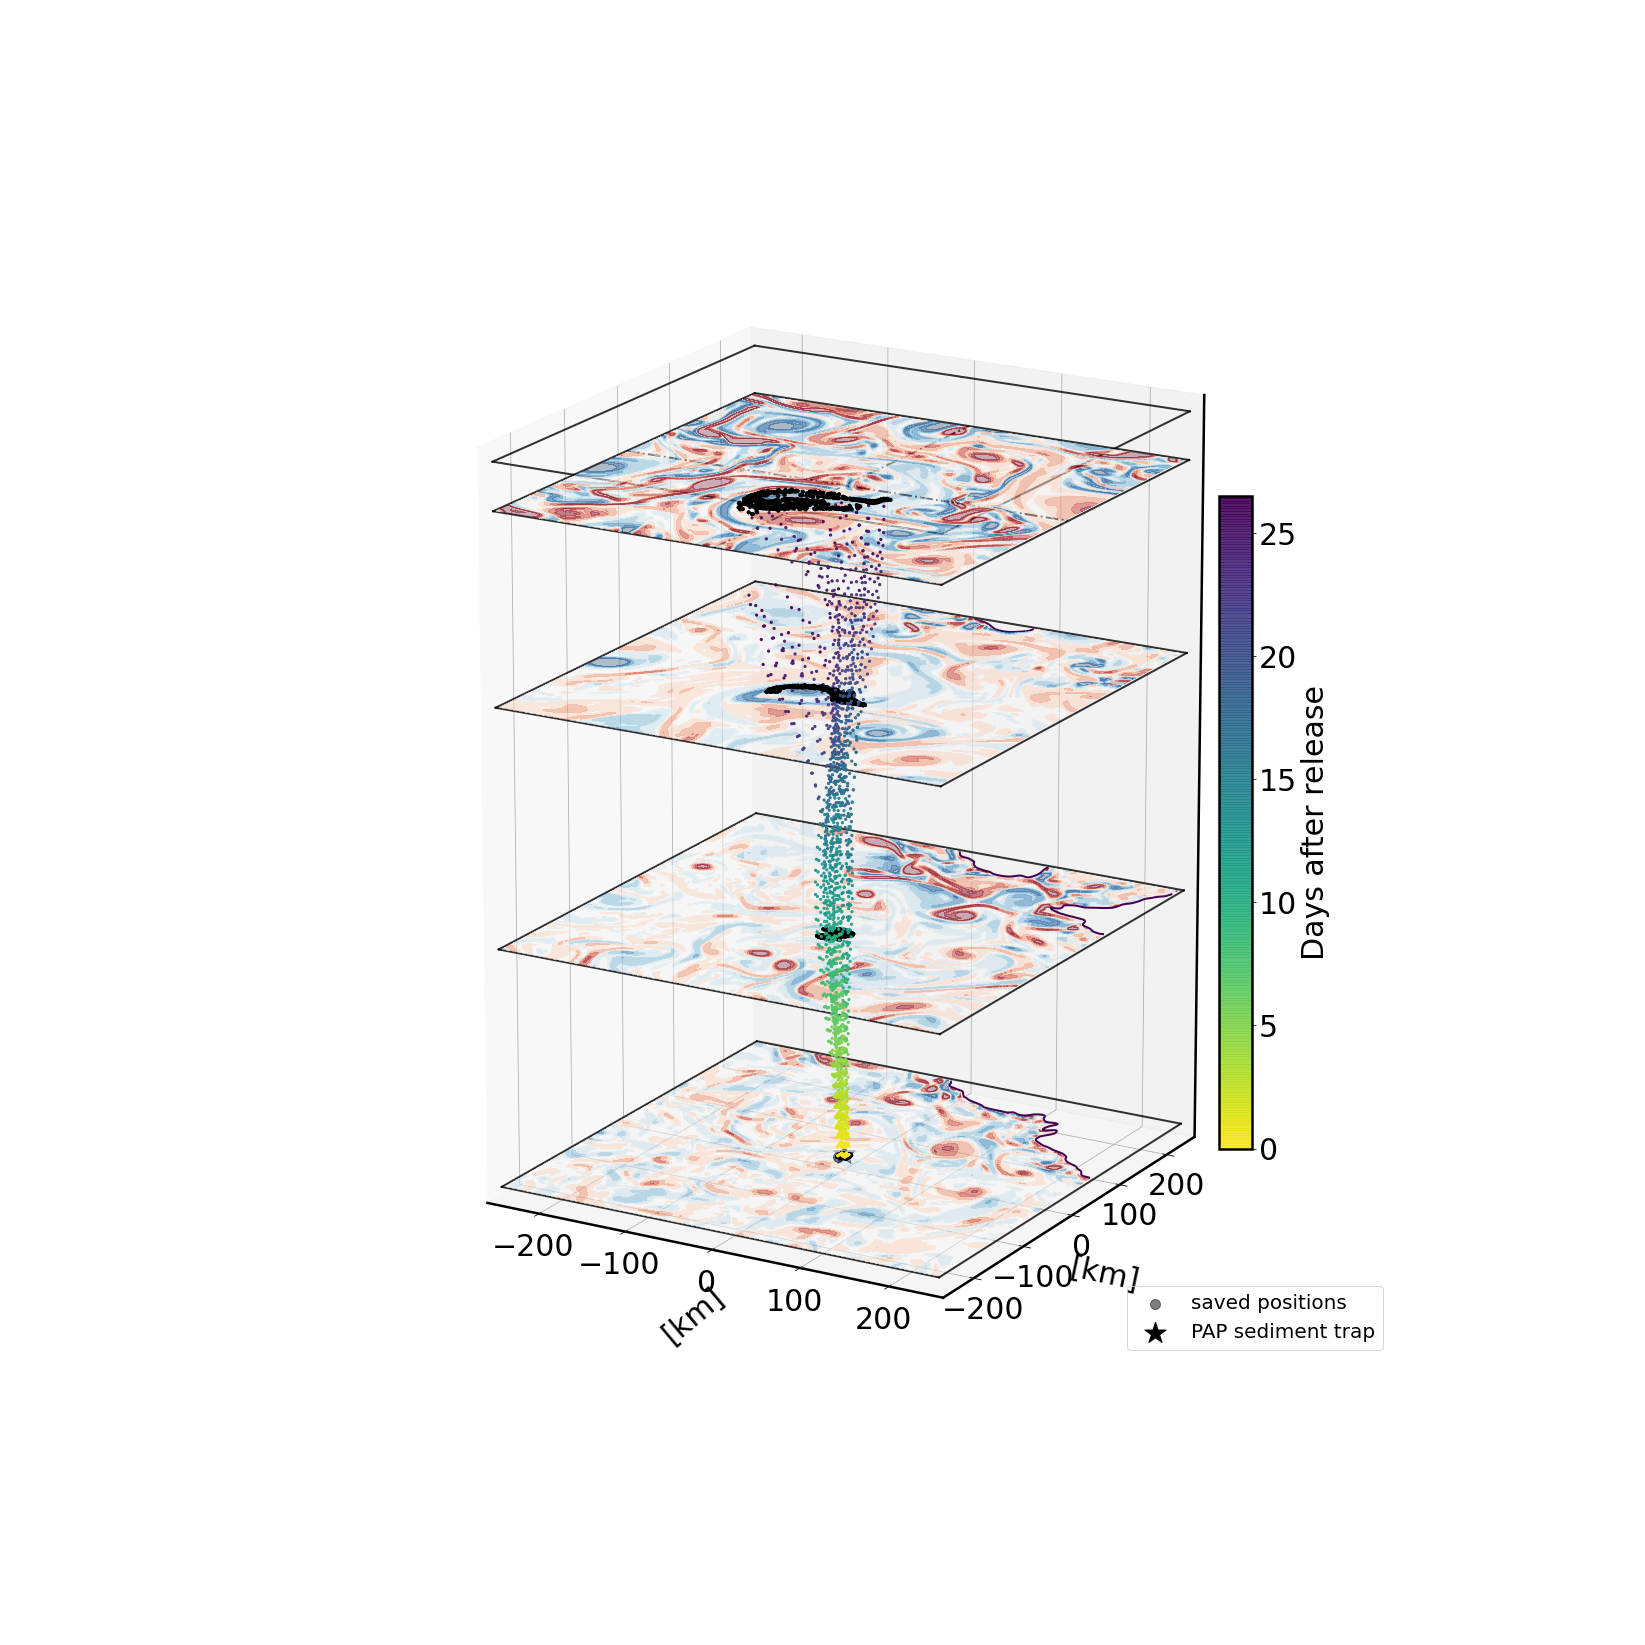

In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

[ic,jc] = [ic_all_list[i_ic],  jc_all_list[i_jc]]

"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=2
y_scale=2
z_scale=4

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)


#for i in range(len(list_level)):
#    plot_pdf_level(tend-number_of_exp-20-i*10,int(ic),int(jc),x_disp_level[i,:],y_disp_level[i,:],npart_trap,list_level,i,0.2+(i*0.1))

#PLOT 3D
labelsize = 30
labelpad = 40 
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import clear_output
import matplotlib.cm as cm

size_part = 10

px_filter = np.ma.masked_where(pdepth > -200,part_x)
py_filter = np.ma.masked_where(pdepth > -200,part_y)

zline = np.linspace(-3000, -200, 8)
zx = np.zeros(100)
xline = np.linspace(-250, 250, 250)
#xz = np.zeros(250)-200
xz = np.zeros(250)
xz_300 = np.zeros(250)-300
xy = np.zeros(250)
yline = np.linspace(-250, 250, 250)

data = [(px_filter[:,0]-part_x[0,0],
         py_filter[:,0]-part_y[0,0], pdepth[:,0])]


fig, ax = plt.subplots(1,1,figsize=(30,30))
ax = plt.axes(projection='3d')
ax.get_proj=short_proj
plt.xticks(size=16)
plt.yticks(size=16)
ax.tick_params(axis='both',labelsize=labelsize,pad=10)
ax.set_xlim(-500, 500)
ax.set_ylim(-500,500)
zline = np.linspace(-1000, 0, 100)
ax.set_xlim(-250, 250)
ax.set_ylim(-250,250)
ax.set_zlim(-3000,0)
ax.set_xlabel('[km]',labelpad=labelpad,size=labelsize,rotation=40)
ax.set_ylabel('[km]',labelpad=labelpad,size=labelsize,rotation=-12)
ax.zaxis.set_tick_params(labelsize=labelsize,pad=50,rotation=25)
ax.set_zticks(np.array([]))


ax.plot3D(xline, xy, xz-200, 'k',linestyle='-.',alpha=1)
ax.plot3D(xy, yline, xz-200, 'k',linestyle='-.',alpha=0.8)


nb_part = pdepth.shape[1]
clear_output(wait=True)

levels_vrt=np.linspace(-0.3,0.3,20)
levels_vrt_pos=np.linspace(0,0.3,10)
levels_vrt_neg=np.linspace(-0.3,0,10)

ax.scatter3D(x_disp_level[0,0], y_disp_level[0,0], -list_level[0], color='k',s =100, marker='o',alpha =0.5,edgecolors=None,label='saved positions');

vrt_lim = 0.15
alpha_vrt=0.3

    
for i in range(len(list_level)):



    levels_vrt=np.linspace(-vrt_lim,vrt_lim,10)
    cp  = ax.contourf(lon, lat, vrt[:,:,i],
    zdir='z', offset=-list_level[i],cmap = plt.cm.RdBu_r,alpha = alpha_vrt,vmin=-vrt_lim,vmax=vrt_lim,levels=levels_vrt,extend='min')

    cp  = ax.contourf(lon, lat, vrt[:,:,i],
    zdir='z', offset=-list_level[i],cmap = plt.cm.RdBu_r,alpha = alpha_vrt,vmin=-vrt_lim,vmax=vrt_lim,levels=levels_vrt,extend='max')
    
    ax.contour(lon, lat, topo,[list_level[i]], zdir='z', offset=-list_level[i])
    
    ax.scatter3D(x_disp_level[i,::1], y_disp_level[i,::1], -list_level[i], color='k',s =size_part, marker='o',alpha =1,edgecolors=None);


for i in range(len(list_level)):

    ax.plot3D(xy-250, yline, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xy+250, yline, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xline, xy-250, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xline, xy+250, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    

# Add square at surface 

surface = 0 
ax.plot3D(xy-250, yline, xz-surface, 'k',linestyle='-',alpha=0.8)
ax.plot3D(xy+250, yline, xz-surface, 'k',linestyle='-',alpha=0.8)
ax.plot3D(xline, xy-250, xz-surface, 'k',linestyle='-',alpha=0.8)
ax.plot3D(xline, xy+250, xz-surface, 'k',linestyle='-',alpha=0.8)

ax.view_init(18, 30-90)

cm = plt.cm.get_cmap('viridis_r')

nb_half_days = number_of_exp+ 60

xy = range(60-2)
z = xy


for i in range(0,nb_part-36,20):

    ax.scatter3D((px_filter[number_of_exp+2:nb_half_days,i]-ic)*dx, (py_filter[number_of_exp+2:nb_half_days,i]-jc)*dx, pdepth[number_of_exp+2:nb_half_days,i], c=z,s = size_part-5, marker='o',alpha =0.9,cmap=cm)
    #pass
    
    #ax.scatter3D(x_disp[number_of_exp+2:nb_half_days,i], y_disp[number_of_exp+2:nb_half_days,i], pdepth[number_of_exp+2:nb_half_days,i], c=z,s = size_part-5, marker='o',alpha =0.9,cmap=cm)
sc = ax.scatter3D((px_filter[number_of_exp+2:nb_half_days,0]-ic)*dx, (py_filter[number_of_exp+2:nb_half_days,0]-jc)*dx, pdepth[number_of_exp+2:nb_half_days,0], c=z,s = size_part-5, marker='o',alpha =0.9,cmap=cm)


cb = fig.colorbar(sc,  ax=[ax], location='right', pad=-.25,shrink=0.4,ticks=[0,10,20,30,40,50])
cb.set_label('Days after release',fontsize=labelsize)
cb.ax.tick_params(labelsize=labelsize)
cb.ax.set_yticklabels(['0','5','10','15','20','25'])


#cb = fig.colorbar(cf,  ax=[ax], location='bottom', pad=-.15,shrink=0.5,extend='both',ticks=[-0.2,0,0.2])
#cb.set_label(r'$\zeta/f$',fontsize=labelsize)
#cb.ax.tick_params(labelsize=labelsize)

ax.scatter3D(-3, 3, -3000,marker = '*',s=500,color='k',label='PAP sediment trap')

plt.legend(prop={'size': 20},bbox_to_anchor=(-0.15, 0.12, 1., .102))

text = '-200 m'
ax.text(-250,-250,-200-165,text,size=30,zdir='x',bbox=props)

text = '-1000 m'
ax.text(-250,-250,-1000-190,text,size=30,zdir='x',bbox=props)

text = '-2000 m'
ax.text(-250,-250,-2000-200,text,size=30,zdir='x',bbox=props)

text = '-3000 m'
ax.text(-250,-250,-3000-210,text,size=30,zdir='x',bbox=props)



props = dict(boxstyle='round', facecolor='white', alpha=1)

plt.tight_layout()

1568

In [33]:
part_x[0,:36]-ic

masked_array(data=[4.00663736, 5.00829669, 6.00995603, 7.01161537,
                   8.01327471, 9.01493405, 4.00663736, 5.00829669,
                   6.00995603, 7.01161537, 8.01327471, 9.01493405,
                   4.00663736, 5.00829669, 6.00995603, 7.01161537,
                   8.01327471, 9.01493405, 4.00663736, 5.00829669,
                   6.00995603, 7.01161537, 8.01327471, 9.01493405,
                   4.00663736, 5.00829669, 6.00995603, 7.01161537,
                   8.01327471, 9.01493405, 4.00663736, 5.00829669,
                   6.00995603, 7.01161537, 8.01327471, 9.01493405],
             mask=False,
       fill_value=1e+20)

In [6]:
# Version avec chlorophyll vu sat et si possible quelques campagnes ?
# Même des données argos ou autre ...


In [7]:
folder_chl = "/home/datawork-lemar-apero/tpicard/DATA_SAT/chl_2023/"
file_chl = "20230530_cmems_obs-oc_atl_bgc-plankton_my_l4-gapfree-multi-1km_P1D.nc"

import xarray as xr

# Ouvrez le fichier NetCDF avec xarray
dataset = xr.open_dataset(folder_chl+file_chl)
chl_plot = dataset['CHL'].sel(time='2023-05-30')
lon_plot = dataset['lon']
lat_plot = dataset['lat']
chl_data = xr.DataArray.to_numpy(chl_plot)
lon_chl,lat_chl = np.meshgrid(xr.DataArray.to_numpy(lon_plot),xr.DataArray.to_numpy(lat_plot))

<ipython-input-8-e12d7e41ae3f>:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(width=10000000/4,height=8000000/4,
<ipython-input-8-e12d7e41ae3f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = m.pcolormesh(xx_chl,yy_chl,chl_data,cmap = plt.cm.YlGn,vmax=3)


NameError: name 'simul' is not defined

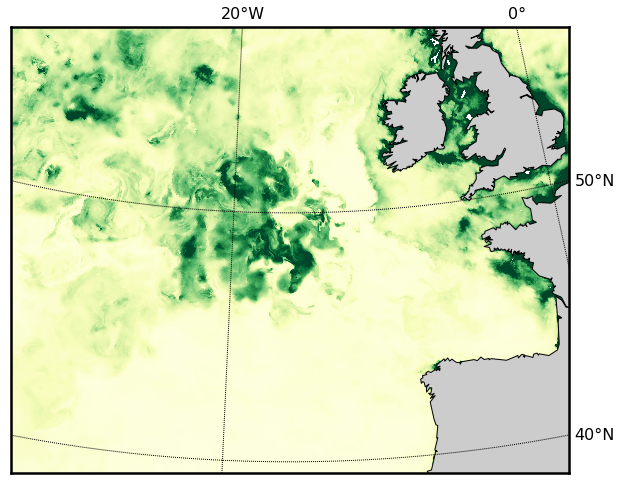

In [8]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,12))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
ax2 = plt.gca()
gs = gridspec.GridSpec(8, 11)

m = Basemap(width=10000000/4,height=8000000/4,
            resolution='l',projection='lcc',\
            lat_ts=38.5,lat_0=48.5,lon_0=-16.5)

m.drawcoastlines()
# draw parallels and meridians.
m.fillcontinents()

m.drawparallels(np.arange(-80.,81.,10.),labels=[False,True,False,False], fontsize = 16)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[False,False,True,False], fontsize =16)
# labels = [left,right,top,bottom]

xx, yy = m(lon, lat)
xx_rrex, yy_rrex = m(lon_rrex, lat_rrex)
xx_pap, yy_pap = m(lon_pap, lat_pap)
xx_chl, yy_chl = m(lon_chl, lat_chl)

#mpos = m.plot(xx_rrex[:,0], yy_rrex[:,0],color='k',alpha=1,linestyle='--',linewidth=3)
#mpos = m.plot(xx_rrex[:,-1], yy_rrex[:,-1],color='k',alpha=1,linestyle='--',linewidth=3)
#mpos = m.plot(xx_rrex[0,:], yy_rrex[0,:],color='k',alpha=1,linestyle='--',linewidth=3)
#mpos = m.plot(xx_rrex[-1,:], yy_rrex[-1,:],color='k',alpha=1,linestyle='--',linewidth=3,label='Domain of the simulation')

mpos = m.plot(xx_pap[:,0], yy_pap[:,0],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[:,-1], yy_pap[:,-1],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[0,:], yy_pap[0,:],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[-1,:], yy_pap[-1,:],color='k',alpha=1,linestyle='--',linewidth=3,label='PAP region')

#plt.legend(prop={'size': 20}, frameon=True,loc=8)
#mlim = m.plot(lon[:,0],lat[:,0],color='k',linewidth=100)
#mpos = m.pcolormesh(xx,yy,temp[:,:,-1],cmap = plt.cm.RdBu_r,vmin=0)

#mpos = m.pcolormesh(xx,yy,vrt,cmap = plt.cm.RdBu_r,vmin=-1,vmax=1)
#CS1 = m.contour(xx,yy,simul.topo,[2000],colors = ('k',), linewidths = (1,))

pc = m.pcolormesh(xx_chl,yy_chl,chl_data,cmap = plt.cm.YlGn,vmax=3)
CS1 = m.contour(xx,yy,simul.topo,[1000],colors = ('k',), linewidths = (1,))

mpos = m.scatter(xx_rrex[ic,jc],yy_rrex[ic,jc],c = 'k',marker = '*',s = 300,label = 'PAP station')
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)

plt.legend(prop={'size': 20},loc = 'upper right')


x, y = m(-29, 54)
x2, y2 = m(-40, 40)


cbaxes = fig.add_axes([0.11, 0.15, 0.8, 0.02]) 
cb = plt.colorbar(pc,ax = ax2, cax = cbaxes,orientation="horizontal")  
cb.set_label(r'Chl $[mg.m^{-3}$]',fontsize=18)

#plt.savefig('map_atlantic_domain.png',dpi=100,bbox_inches='tight')

In [18]:
lon_km_box

array([[3030.81875709, 3030.81875709, 3030.81875709, ..., 3030.81875709,
        3030.81875709, 3030.81875709],
       [3032.81534388, 3032.81534388, 3032.81534388, ..., 3032.81534388,
        3032.81534388, 3032.81534388],
       [3034.81193068, 3034.81193068, 3034.81193068, ..., 3034.81193068,
        3034.81193068, 3034.81193068],
       ...,
       [3224.48767635, 3224.48767635, 3224.48767635, ..., 3224.48767635,
        3224.48767635, 3224.48767635],
       [3226.48426314, 3226.48426314, 3226.48426314, ..., 3226.48426314,
        3226.48426314, 3226.48426314],
       [3228.48084994, 3228.48084994, 3228.48084994, ..., 3228.48084994,
        3228.48084994, 3228.48084994]])

simulname is None
args (['apero', '[567,667,1518,1618,[1,100,1]]', '5170'],)
args[0] ['apero', '[567,667,1518,1618,[1,100,1]]', '5170']
len(args[0]) 3
time of simulation is: 5170
coord
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.05160.nc
get domain [567,667,1518,1618,[1,100,1]] [567,
coordmax
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.05160.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in ncfile.Cs_r
dt
dt is read in  /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.05160.nc
[567, 667, 1518, 1618, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
      

<ipython-input-19-1bdf6858d7f0>:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(width=10000000/5,height=8000000/5,
<ipython-input-19-1bdf6858d7f0>:68: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = m.pcolormesh(xx_chl,yy_chl,chl_data,cmap = plt.cm.YlGn,vmax=3)


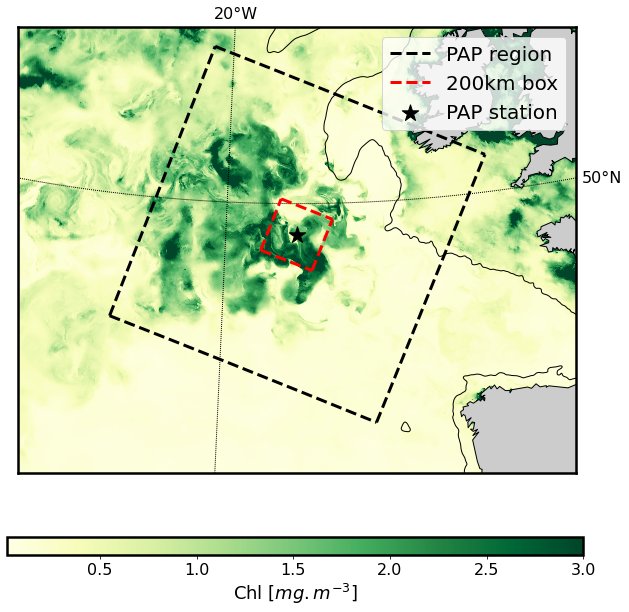

In [19]:
[ic,jc] = np.load('/home2/datahome/tpicard/Pyticles/Inputs/ic_jc.npy')
my_simul = 'apero'
#parameters = my_simul + ' [1068,2068,117,1117,[1,100,1]] '+ format(date_plot_AC)
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(jc-50,jc+50,ic-50,ic+50)
parameters = my_simul +str_para+ format(t_date)
simul_pap = load(simul = parameters, floattype=np.float64)

coord = 'deg'
lon_box = simul_pap.x; lat_box = simul_pap.y
[lon_km_box,lat_km_box] = np.meshgrid(np.arange(simul_pap.x.shape[0])+simul_pap.coord[2],np.arange(simul_pap.x.shape[1])+simul_pap.coord[0])
lon_km_box = (lon_km_box/np.mean(simul_pap.pm)*1e-3).T
lat_km_box = (lat_km_box/np.mean(simul_pap.pn)*1e-3).T


%matplotlib inline
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,12))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
ax2 = plt.gca()
gs = gridspec.GridSpec(8, 11)

m = Basemap(width=10000000/5,height=8000000/5,
            resolution='l',projection='lcc',\
            lat_ts=38.5,lat_0=48.5,lon_0=-16.5)

m.drawcoastlines()
# draw parallels and meridians.
m.fillcontinents()

m.drawparallels(np.arange(-80.,81.,10.),labels=[False,True,False,False], fontsize = 16)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[False,False,True,False], fontsize =16)
# labels = [left,right,top,bottom]

xx, yy = m(lon, lat)
xx_rrex, yy_rrex = m(lon_rrex, lat_rrex)
xx_pap, yy_pap = m(lon_pap, lat_pap)
xx_chl, yy_chl = m(lon_chl, lat_chl)
xx_box, yy_box = m(lon_box, lat_box)

#mpos = m.plot(xx_rrex[:,0], yy_rrex[:,0],color='k',alpha=1,linestyle='--',linewidth=3)
#mpos = m.plot(xx_rrex[:,-1], yy_rrex[:,-1],color='k',alpha=1,linestyle='--',linewidth=3)
#mpos = m.plot(xx_rrex[0,:], yy_rrex[0,:],color='k',alpha=1,linestyle='--',linewidth=3)
#mpos = m.plot(xx_rrex[-1,:], yy_rrex[-1,:],color='k',alpha=1,linestyle='--',linewidth=3,label='Domain of the simulation')

mpos = m.plot(xx_pap[:,0], yy_pap[:,0],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[:,-1], yy_pap[:,-1],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[0,:], yy_pap[0,:],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_pap[-1,:], yy_pap[-1,:],color='k',alpha=1,linestyle='--',linewidth=3,label='PAP region')

mpos = m.plot(xx_box[:,0], yy_box[:,0],color='r',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_box[:,-1], yy_box[:,-1],color='r',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_box[0,:], yy_box[0,:],color='r',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_box[-1,:], yy_box[-1,:],color='r',alpha=1,linestyle='--',linewidth=3,label='200km box')


#plt.legend(prop={'size': 20}, frameon=True,loc=8)
#mlim = m.plot(lon[:,0],lat[:,0],color='k',linewidth=100)
#mpos = m.pcolormesh(xx,yy,temp[:,:,-1],cmap = plt.cm.RdBu_r,vmin=0)

#mpos = m.pcolormesh(xx,yy,vrt,cmap = plt.cm.RdBu_r,vmin=-1,vmax=1)
#CS1 = m.contour(xx,yy,simul.topo,[2000],colors = ('k',), linewidths = (1,))

pc = m.pcolormesh(xx_chl,yy_chl,chl_data,cmap = plt.cm.YlGn,vmax=3)
CS1 = m.contour(xx,yy,simul.topo,[1000],colors = ('k',), linewidths = (1,))

mpos = m.scatter(xx_rrex[ic,jc],yy_rrex[ic,jc],c = 'k',marker = '*',s = 300,label = 'PAP station')
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)

plt.legend(prop={'size': 20},loc = 'upper right')


x, y = m(-29, 54)
x2, y2 = m(-40, 40)


cbaxes = fig.add_axes([0.11, 0.15, 0.8, 0.02]) 
cb = plt.colorbar(pc,ax = ax2, cax = cbaxes,orientation="horizontal")  
cb.set_label(r'Chl $[mg.m^{-3}$]',fontsize=18)

#plt.savefig('map_atlantic_domain_box_200km.png',dpi=100,bbox_inches='tight')